In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline

# グループ5： 九州における鳥インフルエンザ感染拡大のシミュレーション

## 練習として簡単なSIRを動かしてみる

## モデル式
$$
\frac{dS}{dt} = -\lambda S * I \\ 
\frac{dI}{dt} = \lambda S * I - \gamma I \\
R = N - (S + I) \\
$$

In [136]:
def f(y, a):
    return a * y
def rk(x,y,h,func, *static_args):
    y0d=func(y, *static_args)
    y1=y+y0d*h/2.0
    y1d=func(y1, *static_args)
    y2=y+y1d*h/2.0
    y2d=func(y2, *static_args)
    y3=y+y2d*h/2.0
    y3d=func(y3, *static_args)
    return y+(y0d+2.0*y1d+2.0*y2d+y3d)*h/6.0

In [145]:
y=1.0
x=0.0
h=0.01
m= 1000
a = 1
xx=m*[0.0]
y2=m*[0.0]
for i in range(m):
    y=rk(x,y,h,f, a)
    x=x+h
    xx[i]=x
    y2[i]=y

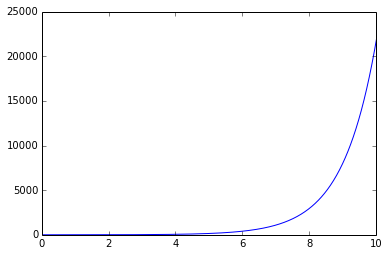

In [146]:
plt.plot(xx, y2)

In [162]:
def dS(S, I, beta):
    return -beta * I  * S
def dI(I, S, beta, gamma):
    return beta * I  * S - gamma * I

def rk(x,y,h,func, *static_args):
    y0d=func(y, *static_args)
    y1=y+y0d*h/2.0
    y1d=func(y1, *static_args)
    y2=y+y1d*h/2.0
    y2d=func(y2, *static_args)
    y3=y+y2d*h/2.0
    y3d=func(y3, *static_args)
    return y+(y0d+2.0*y1d+2.0*y2d+y3d)*h/6.0

In [191]:
I = 1
S = 99
beta = 2
gamma = 8
dt = 1
I=1
S=100
x=0.0
h=0.001
m= 100
xx=m*[0.0]
Ss=m*[0.0]
Is=m*[0.0]
for i in range(m):
    # 微分方程式に従って値を更新
    S=rk(x,S,h,dS, I, beta)
    I=rk(x,I,h,dI, S, beta, gamma)
    print S, I
    Ss[i]=S
    Is[i]=I
    # 時間を更新
    x=x+h
    xx[i]=x


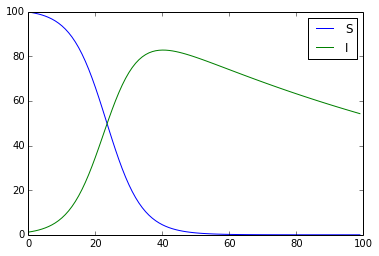

In [193]:
plt.plot(Ss, label='S')
plt.plot(Is, label='I')
plt.legend()

In [200]:
def dS(S, I, beta):
    return -beta * I  * S
def dI(I, S, beta, gamma):
    return beta * I  * S - gamma * I

def rk(x,y,h,func, *static_args):
    '''
    ルンゲクッタ法を実行して，微分方程式から次の実行ステップの微分方程式
    の行き先を返す関数
    y: その地点での微分方程式の解の値
    h: 刻み幅(dt)
    func: 解く微分方程式
    *static_args: 微分方程式に代入する他の変数
    '''
    y0d=func(y, *static_args)
    y1=y+y0d*h/2.0
    y1d=func(y1, *static_args)
    y2=y+y1d*h/2.0
    y2d=func(y2, *static_args)
    y3=y+y2d*h/2.0
    y3d=func(y3, *static_args)
    return y+(y0d+2.0*y1d+2.0*y2d+y3d)*h/6.0

In [212]:
# パラメタ
beta = 2
gamma = 8
# 初期値
N = 5000
# 時間, 刻み幅
time = 0.0
# 時間刻み
dt = 1
h = 0.001
duration = 1000
times = np.zeros(duration)
Ss = np.zeros(duration)
Is = np.zeros(duration)
Rs = np.zeros(duration)
for i in range(duration):
    # 微分方程式に従って値を更新
    S=rk(time,S,h,dS, I, beta)
    I=rk(time,I,h,dI, S, beta, gamma)
    Ss[i]=S
    Is[i]=I
    Rs[i]=N-(I+S)
    # 時間を更新
    time=time+dt
    times[i]=time

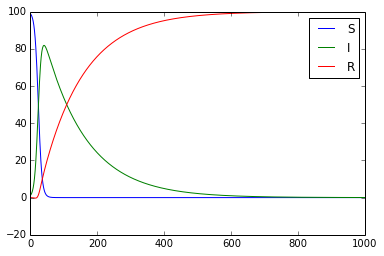

In [213]:
plt.plot(Ss, label='S')
plt.plot(Is, label='I')
plt.plot(Rs, label='R')
plt.legend()

In [214]:
# Ss, Is, Rsをマルチにする．各行がそれぞれの地点に対応し，各列が同時刻のデータに対応する

In [226]:
a = np.arange(5)

In [230]:
a[3]

1

In [2]:
def dS_multi(S, I, beta, node, St, It, C):
    '''
        St, It: vector
        node: 更新するノード
    '''
    # 和のファクタの計算
    other_nodes = np.ones_like(It, dtype=bool) * np.True_
    other_nodes[node] = np.False_
    return -beta * I  * S - beta * np.sum(S * It[other_nodes] * C[other_nodes])

def dI_multi(I, S, beta, gamma, node, St, It, C):
    '''
        St, It: vector
        node: 更新するノード
    '''
    # 和のファクタの計算
    other_nodes = np.ones_like(It, dtype=bool) * np.True_
    other_nodes[node] = np.False_
    return beta * I  * S + beta * np.sum(S * It[other_nodes]* C[other_nodes]) - gamma * I 

def rk(y,h,func, *static_args):
    '''
    ルンゲクッタ法を実行して，微分方程式から次の実行ステップの微分方程式
    の行き先を返す関数
    y: その地点での微分方程式の解の値
    h: 刻み幅(dt)
    func: 解く微分方程式
    *static_args: 微分方程式に代入する他の変数
    '''
    y0d=func(y, *static_args)
    if np.abs(y0d) < 1e-8:
        y0d = 0
    y1=y+y0d*h/2.0
    y1d=func(y1, *static_args)
    if np.abs(y1d) < 1e-8:
        y1d = 0
    y2=y+y1d*h/2.0
    y2d=func(y2, *static_args)
    if np.abs(y2d) < 1e-8:
        y2d = 0
    y3=y+y2d*h/2.0
    y3d=func(y3, *static_args)
    if np.abs(y3d) < 1e-8:
        y3d = 0
    return np.abs(y+(y0d+2.0*y1d+2.0*y2d+y3d)*h/6.0)

In [3]:
# パラメタ
#beta = 2/5 
#gamma = 1/6
beta = 0.4
#gamma = 0.6  * 0.1
gamma = .166666667
# 初期時間
time = 0.0
# 時間刻み
dt = 1e-5
# シミュレーション日数
duration = int(30e+5)
times = np.zeros(duration)
num_node = 2
Ns = np.zeros(num_node)
Ss = np.zeros((num_node, duration))
Is = np.zeros((num_node, duration))
Rs = np.zeros((num_node, duration))
# 暫定的なCt, 実際はここらへんで計算しておく
Ct = np.ones((num_node, num_node)) * 0
# 初期値
Ns[:] = 5000
Ss[:, 0] = 4900
Is[:, 0] = 100
for j in range(1, duration):
    # 微分方程式に従って値を更新
    for i in range(num_node):        
        Ss[i, j] = rk(Ss[i, j-1], dt, dS_multi, Is[i, j-1], beta, i, Ss[:, j], Is[:, j], Ct[i, :])
        Is[i, j] = rk(Is[i, j-1], dt, dI_multi, Ss[i, j-1], beta, gamma, i, Ss[:, j], Is[:, j], Ct[i, :])
        Rs[i, j] = Ns[i] - (Is[i, j] + Ss[i, j])
        # 時間を更新
    times[j] = times[j-1] + dt

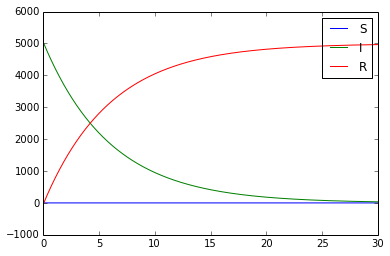

In [4]:
plt.plot(times, Ss[0, :], label='S')
plt.plot(times, Is[0, :], label='I')
plt.plot(times, Rs[0, :], label='R')
plt.legend()

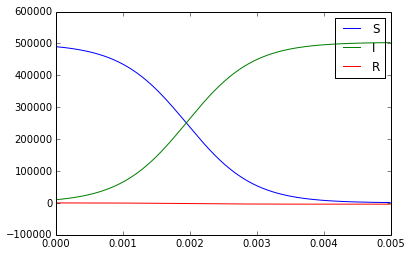

In [25]:
end = 500
plt.plot(times[0:end], Ss[0, 0:end]*100, label='S')
plt.plot(times[0:end], Is[0, 0:end]*100, label='I')
plt.plot(times[0:end], Rs[0, 0:end]*100, label='R')
plt.legend()

In [143]:
Ss[0, -1], Is[0, -1], Rs[0, -1]

(2.3400237140197614e-41, 9.8413548132877278, 40.15864518671227)

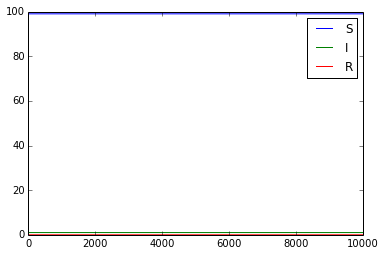

In [259]:
plt.plot(Ss[1, :], label='S')
plt.plot(Is[1, :], label='I')
plt.plot(Rs[1, :], label='R')
plt.legend()

In [36]:
geo_data = pd.read_excel('../data/geo_data.xls')

In [37]:
geo_data

,MESH_ID,population per grid,bird house per grid,x,y
0,483022,212.388873,0.048285,130.310207,32.211750
1,493240,227.219123,0.027662,132.060026,33.045029
2,493220,238.449943,0.050156,132.060039,32.878388
3,493250,254.670676,0.000000,132.060030,33.128355
4,463062,316.392284,0.063887,130.310242,31.211860
5,493003,317.552718,0.220971,130.435180,32.711699
6,473113,343.231812,0.102835,131.435130,31.461853
7,463046,419.374128,0.665755,130.810196,31.045221
8,493176,420.967305,0.015826,131.810042,33.294996
9,503030,495.328189,0.093982,130.060188,33.628258


In [39]:
# まずざっとプロットしてみる．x, yのみ

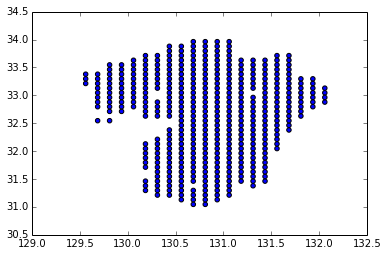

In [40]:
plt.scatter(geo_data['x'], geo_data['y'])

In [42]:
geo_data['x'][0]

130.3102069

In [49]:
distance_distribution = list()
for row1 in range(geo_data.shape[0]):
    for row2 in range(row1):
        distance_distribution.append(
            np.sqrt(
                (geo_data['x'][row1]-geo_data['x'][row2])**2+
                (geo_data['y'][row1]-geo_data['y'][row2])**2))

(array([  7199.,  13427.,  15709.,  15912.,  15090.,  12093.,   8983.,
          5181.,   1812.,    297.]),
 array([ 0.08330747,  0.36901325,  0.65471902,  0.9404248 ,  1.22613057,
         1.51183634,  1.79754212,  2.08324789,  2.36895367,  2.65465944,
         2.94036522]),
 <a list of 10 Patch objects>)

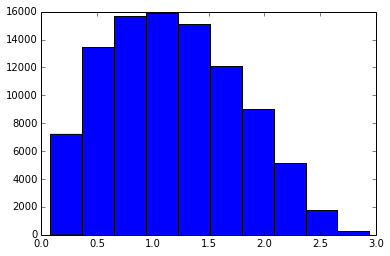

In [50]:
plt.hist(distance_distribution)

In [46]:
distance_distribution

[135.17842859093165,
 135.15857873221321,
 136.11142297114986,
 135.18835804046046,
 136.14175878472591,
 136.12148842751299,
 134.11242787098979,
 135.05617667773271,
 135.03692580309337,
 135.06580668493626,
 134.35302900996098,
 135.30052607229405,
 135.28038621151009,
 135.31060050110116,
 134.23126663301653,
 134.68771426175957,
 135.63548424538251,
 135.61616206466445,
 135.64514992625232,
 134.57089824684462,
 134.80703086327986,
 134.33512070079593,
 135.28003612829818,
 135.26091978761212,
 135.28959889116675,
 134.21954962012012,
 134.45368517000182,
 134.79538334645369,
 135.08768959995348,
 136.0406984701757,
 136.02031096324768,
 136.05089673345333,
 134.96442951995218,
 135.21021562665146,
 135.54332240542911,
 135.18782458701514,
 134.28102996728563,
 135.22942926664678,
 135.20871398195442,
 135.23979134800049,
 134.15578659011265,
 134.40409765452168,
 134.73115828465674,
 134.37706417251979,
 135.14026581948826,
 134.08171394495415,
 135.02563877129097,
 135.006229262

$$
c_{i, j}=\exp{-d_{i, j}}
$$
での減衰を考える